In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

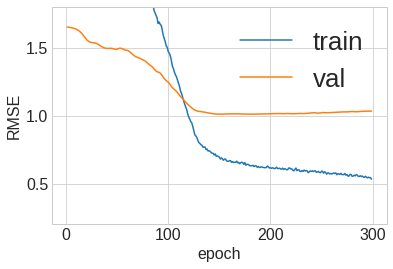

Final RMSE:
 electronic-stack      iter    rmse
141   181  1.0103
Final RMSE:
 electronic-sum     iter    rmse
29   159  1.0278


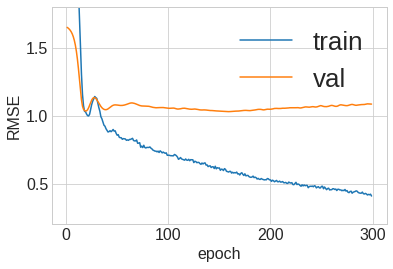

In [22]:
figure_path = '/home/weiss/git/thesis/doc/figures/'

dirs = ['log/electronic-stack/', 'log/electronic-sum/']

for d in dirs:
    try:
        train_loss = pd.read_csv(glob( d + 'train*')[0])
        val_loss = pd.read_csv(glob( d + 'val*')[0])
        test_loss = pd.read_csv(glob( d + 'test*')[0])

        model_name = d.split("/")[1]

        plt.rcParams['font.size'] = 16
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        plt.rcParams['legend.fontsize'] = 16
        plt.plot('iter', 'rmse', data=train_loss, label='train')
        plt.plot('iter', 'rmse', data=val_loss, label='val')

        #plt.title(f"Loss function over epochs ({model_name})")
        plt.rcParams['font.size'] = 26
        plt.rcParams['axes.labelsize'] = 26
        plt.rcParams['xtick.labelsize'] = 26
        plt.rcParams['ytick.labelsize'] = 26
        plt.rcParams['legend.fontsize'] = 26
        plt.xlabel("epoch")
        plt.ylabel("RMSE")
        plt.legend()
        plt.style.use('seaborn-whitegrid')
        plt.ylim([0.2, 1.8])
        plt.savefig(figure_path + '/' + model_name + '-gcmc-loss.png', dpi=300, bbox_inches='tight')
        plt.show()
        print('Final RMSE:\n', model_name, test_loss[test_loss['rmse'] == test_loss['rmse'].min()])

    except Exception as e:
        print(e)
